In [1]:
# Установка зависимостей
!pip install -q transformers torch pillow matplotlib

In [2]:
# Импорт необходимых библиотек
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt
import os
from pathlib import Path

## Загрузка модели

In [3]:
# Используем pipeline из библиотеки transformers для удобной работы с моделями
# Параметры: 'image-classification' - тип задачи (классификация изображений), model - название модели на Hugging Face Hub
classifier = pipeline('image-classification',
                     model='prithivMLmods/Augmented-Waste-Classifier-SigLIP2')
print(f'Модель определяет {classifier.model.config.num_labels} классов отходов')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


Модель определяет 10 классов отходов


## Функция для анализа изображений отходов

In [4]:
# Функция выполняет полный цикл: загрузка изображения → визуализация →
# классификация моделью → вывод результатов.
def analyze_waste(image_path):
    try:
        # Загрузка и визуализация изображения
        image = Image.open(image_path)
        plt.figure(figsize=(10, 4))
        plt.imshow(image)
        plt.axis('off')
        plt.title(f'Анализируем: {Path(image_path).name}')
        plt.show()

        # Классификация с помощью предобученной модели
        results = classifier(image)

        # Обработка и вывод результатов
        print('Результаты классификации:')
        top_result = results[0]
        print(f'Основное предсказание: {top_result["label"]}')
        print(f'Уверенность: {round(top_result["score"], 3)}')

    except Exception as e:
        print(f'Ошибка: {e}')
        return None

## Демонстрация работы

Анализ файла: plastic_bottle.jpg


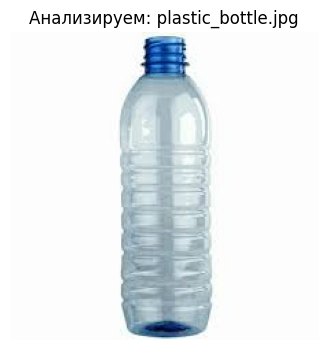

Результаты классификации:
Основное предсказание: Plastic
Уверенность: 0.999


In [5]:
# Замените на путь к вашему файлу
# Файл должен находиться в той же директории, что и ноутбук,
# или необходимо указать полный путь (например, 'images/plastic_bottle.jpg')
your_image = 'plastic_bottle.jpg'

# Проверяем существование файла перед началом обработки
if os.path.exists(your_image):
    print(f'Анализ файла: {your_image}')
    results = analyze_waste(your_image)
else:
    print('Файл не найден! Создайте тестовые изображения:')
    print('1. Сфотографируйте пластиковую бутылку')
    print('2. Сохраните как "plastic bottle.jpg"')
    print('3. Перезапустите эту ячейку')

## Тестирование работы на нескольких фото

Тестирование на разных типах отходво

 Изображение: plastic_bottle.jpg


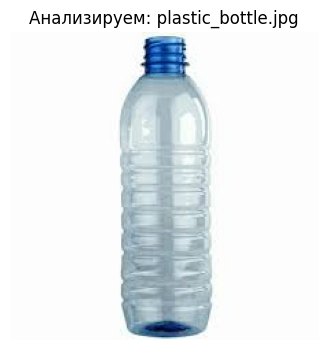

Результаты классификации:
Основное предсказание: Plastic
Уверенность: 0.999

 Изображение: battery.jpg


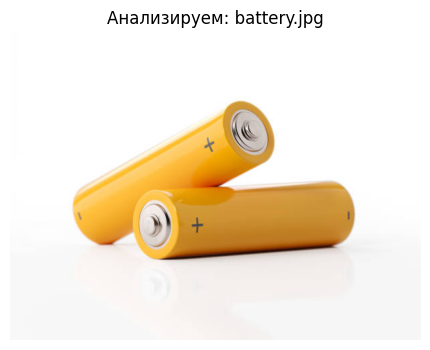

Результаты классификации:
Основное предсказание: Battery
Уверенность: 0.997

 Изображение: paper.jpg


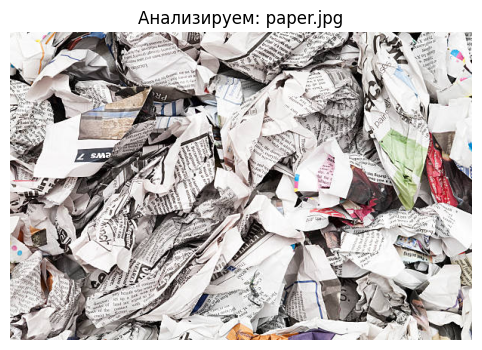

Результаты классификации:
Основное предсказание: Paper
Уверенность: 0.999

 Изображение: glass.jpg


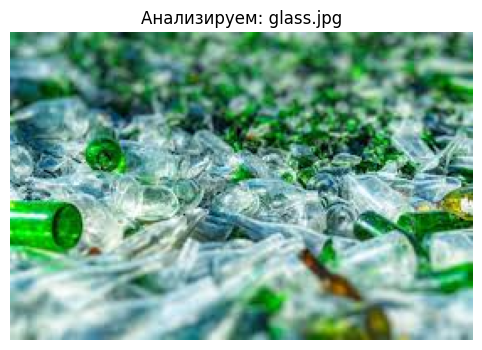

Результаты классификации:
Основное предсказание: Glass
Уверенность: 0.995


In [6]:
# Список тестовых изображений
test_images = [
    'plastic_bottle.jpg',   # Пластик
    'battery.jpg',          # Батарейка
    'paper.jpg',            # Бумага
    'glass.jpg'             # Стекло
]

print('Тестирование на разных типах отходво')

for img_path in test_images:
    if os.path.exists(img_path):
        print(f'\n Изображение: {Path(img_path).name}')
        analyze_waste(img_path)
    else:
        print(f'\n Файл отсутствует: {img_path}')